# Signals and Systems CA1

Question 4: Convolution

# Discrete-time Signals

# Convolution
# 4.1.1.1
First we save x[n], y[n] and h[n] from results of last part:

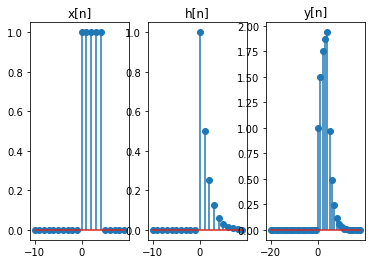

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sig

N = 10
title = "{}[n]"

def plot(_signal, i, j, x, y):
    plt.subplot(1, j, i+1)
    plt.stem(x, y, use_line_collection=True)
    plt.title(title.format(_signal))

def get_convolution_matrix(_n, h):
    _m = len(h)
    matrix = np.zeros((_n, _n + _m - 1))
    for i in range(_n):
        matrix[i ,i:i+_m] = h
    return matrix

def convolve(x, h):
    return np.dot(x, get_convolution_matrix(len(x), h))

ss = "xhy"
n = np.arange(-N, N, 1).astype(float)
new_n = np.arange(-2*N, 2*N - 1, 1).astype(float)
signals = list()
signals.append(np.piecewise(n, [np.logical_or(n < 0, n > 4), np.logical_and(n >= 0, n <= 4)], [0, 1]))
signals.append(np.piecewise(n, [n < 0, n >= 0], [0, lambda n: (1/2)**n]))
signals.append(convolve(signals[0], signals[1]))
for index, signal in enumerate(ss):
    if signal == 'y':
        n_final = new_n
    else:
        n_final = n
    plot(signal, index, len(ss), n_final, signals[index])
plt.show()

# 4.1.1.2
Using signal.convolve():

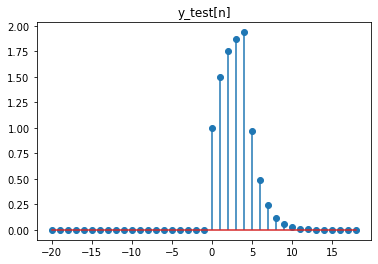

In [83]:
def draw(name, x_, y_):
    plt.stem(x_, y_, use_line_collection=True)
    plt.title(title.format(name))
    plt.show()

new_n = np.arange(-2*N, 2*N - 1, 1).astype(float)
y_test = sig.convolve(signals[0], signals[1])
draw("y_test", new_n, y_test)

As you can see, the result is the same as what we calculated in 4.1.1.1

# 4.1.1.3
There are three modes for signal.convolve; In "full" mode, function calculates full discrete linear convolution of the inputs.
In "valid" mode, function only calculates discrete linear convolution of those elements that do not rely on the zero-padding.
Finally, in "same" mode, the output signal has same size as input signal, centered with respect to the ‘full’ output.

# 4.1.2.1
We use the inverse of convolution's matrix to find the deconvolution:

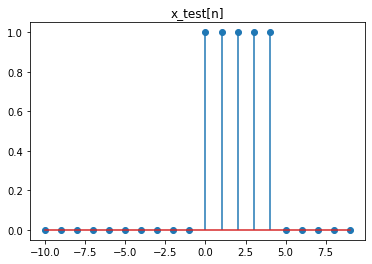

In [84]:
def deconvolve(y, h):
    return np.dot(y, np.linalg.pinv(get_convolution_matrix(len(y) - len(h) + 1, h)))

x_test = deconvolve(signals[2], signals[1])
draw("x_test", n, x_test)

# 4.1.2.2

Result of deconvolution is unique if and only if the matrix of convolution is invertible.
If it's invertible, the result of deconvolve is unique but if isn't, the pseudo algorithm
for finding the inverse of the matrix makes the result is not unique.

# 4.1.2.3
Now we find the deconvolution by signal.deconvolve():
As you can see, the results are the same(just need a little shift to make it fix)

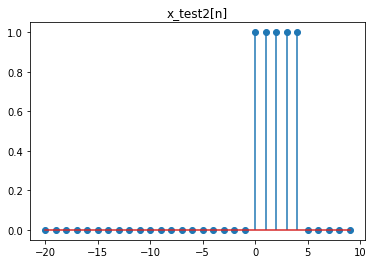

In [85]:
new_n_1 = np.arange(-2*N, N, 1).astype(float)
x_test2 = np.array(sig.deconvolve(signals[2], signals[1][10:]), dtype=object)[0]
draw("x_test2", new_n_1, x_test2)

# Continuous-time Signals

# 4.2.1.1
$$x(t) = e^{-\alpha t}u(t), \alpha > 0$$
$$h(t) = u(t)$$

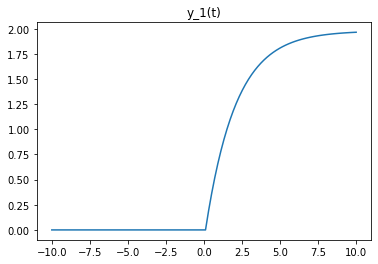

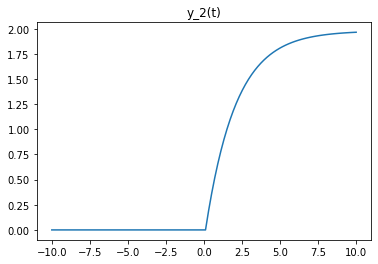

In [101]:
alpha = 0.5

new_title = "{}(t)"
def new_draw(name, x_, y_):
    plt.plot(x_, y_)
    plt.title(new_title.format(name))
    plt.show()

t = np.linspace(-N, N, 10*N)
sampling_period = 2/10
u = np.piecewise(t, [t < 0, t >= 0], [0, 1])
x = np.exp(-alpha*t)*u
h = u
y_1 = np.convolve(x, h, mode="same")*sampling_period
new_draw("y_1", t, y_1)
y_2 = sig.convolve(x, h, mode="same")*sampling_period
new_draw("y_2", t, y_2)

# 4.2.1.2
$$y(t) = x(t)*h(t) = \int_{-\infty}^{\infty} x(t - \tau)h(\tau)d\tau \Rightarrow \int_{0}^{\infty} x(t - \tau)d\tau$$
$$\Rightarrow t < 0: y(t) = 0 , t > 0: \int_{0}^{t} e^{-\alpha (t - \tau)} d\tau$$
$$\Rightarrow t > 0: \frac{1-e^{-\alpha t}}{\alpha} \Rightarrow t \rightarrow \infty $$

# 4.2.1.3
Pay attention! We should multiply the response by sampling period, because we are taking samples from a continuous-time signal,
so if we write the equations, we'll see that this sampling period will be shown in the final response. (sampling_period * response)

# 4.2.2.1
For the response we have(we assume that $$x(t)$$ is a square function:
$$y(t) = x(t)*h(t) = \int_{-\infty}^{\infty} x(t - \tau)h(\tau)d\tau = \int_{0}^{\infty} x(t - \tau)d\tau$$
$$\Rightarrow t < -2: y(t) = 0, -2 \leq t \leq 2: y(t) = t + 2, t > 2: y(t) = 4$$

# 4.2.2.2

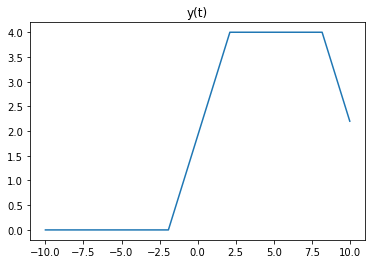

In [103]:
x = np.piecewise(t, [np.logical_or(t < -2, t > 2), np.logical_and(t >= -2, t <= 2)], [0, 1])
y = np.convolve(x, h, mode="same")*sampling_period
new_draw("y", t, y)

The figure is similar to what we calculate, except for that ending line in the figure.
This falling line is because we used discrete convolution to simulate  